# SYS 611: Euler Integration (Continuous Time Simulation)

Paul T. Grogan <pgrogan@stevens.edu>

This example shows how to perform Euler integration for continuous time simulation. The system to be simulated is a hypothetical basin that is being filled with water. The state variable (q) is the volume of water in the basin. The time derivative (dq/dt=x(t)) is the flow rate of water into the basin, set to x(t)=t for this example. The output variable (y) is omitted in this example.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` library for numerical functions and `matplotlib.pyplot`, library for plotting.

In [13]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
# see http://docs.scipy.org/doc/numpy/reference/ for documentation
import numpy as np

# import the matplotlib pyplot package and refer to it as `plt`
# see http://matplotlib.org/api/pyplot_api.html for documentation
import matplotlib.pyplot as plt

## State Transition Function (and Time Derivatives)
Define functions for the state transition function (delta) along with the state time derivative and the flow rate.

In [14]:
# define the state transition function
def _delta(q, dq_dt, delta_t):
    return q + delta_t*dq_dt

# define the time derivative
def dq_dt(q, t):
    return x(t)

# define the flow rate
def x(t):
    return t

## State and Output Trajectories

Define lists to store the state and time trajectories (initialize with zero value).

In [15]:
# define the state and time trajectories (zero initial value)
q = np.zeros(num_steps + 1)
t = np.zeros(num_steps + 1)

## Continuous Time Simulation Logic

The discrete event simulation should start by setting the initial time and state. Then, enter a loop to:
1. Compute the current output
2. Compute the next state
3. Update the time

In [16]:
# configure the simulation
delta_t = 0.5
num_steps = int(5.0/delta_t)

# initialize the simulation
q[0] = 5.0
t[0] = 0.0

# execute the simulation
for i in range(num_steps):
  q[i+1] = _delta(q[i], dq_dt(q[i], t[i]), delta_t)
  t[i+1] = t[i] + delta_t

## Visualize Outcomes

Use bar plots in `matplotlib` to plot the input, state, and output trajectories.

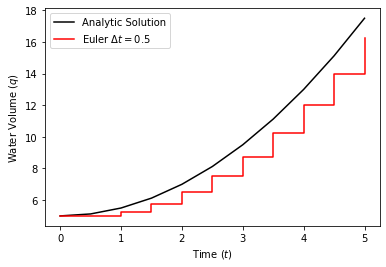

In [17]:
plt.figure()
# plot the analytical solution solved with calculus (5+t^2/2) with a black line
plt.plot(t, 5+t**2/2, '-k', label='Analytic Solution')
# plot the simulated solution with a red line
plt.step(t, q, '-r', where='post', label='Euler $\Delta t={:}$'.format(delta_t))
# label and display pot
plt.xlabel('Time ($t$)')
plt.ylabel('Water Volume ($q$)')
plt.legend(loc='best')
plt.show()